# Calculating cos(x) with a neural network

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD


import math
import matplotlib.pyplot as plt
import numpy as np
import random as rd

Using TensorFlow backend.


# Event Generation: y = cos(x)
Generate some number of test and training events

In [2]:
# Number of events to generate.
Nevts_train = 10000
Nevts_test = 1000

# Set up the training sets.
x_train = np.zeros([Nevts_train,1]); x_test = np.zeros([Nevts_test,1])
y_train = np.zeros([Nevts_train,1]); y_test = np.zeros([Nevts_test,1])

# Generate y = cos(x) for x in [0,2pi).
Nevts = Nevts_train + Nevts_test
for nn in range(Nevts):

    if(nn % int(Nevts/10) == 0):
        print("-- Event {0} of {1} ...".format(nn,Nevts))

    # Generate angle and cosine.
    th0 = rd.random()*2*math.pi
    cth0 = math.cos(th0)
    
    # Write the information to the datasets.
    if(nn >= Nevts_train):
        x_test[nn-Nevts_train][0] = th0/(2.*math.pi)
        y_test[nn-Nevts_train][0] = (1 + cth0)/2.
    else:
        x_train[nn][0] = th0/(2.*math.pi)
        y_train[nn][0] = (1 + cth0)/2.
        

-- Event 0 of 11000 ...
-- Event 1100 of 11000 ...
-- Event 2200 of 11000 ...
-- Event 3300 of 11000 ...
-- Event 4400 of 11000 ...
-- Event 5500 of 11000 ...
-- Event 6600 of 11000 ...
-- Event 7700 of 11000 ...
-- Event 8800 of 11000 ...
-- Event 9900 of 11000 ...


# Keras-based NN
Now build a NN and run the training step using Keras

In [3]:
model = Sequential()
model.add(Dense(units=1024, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(units=1))
model.add(Activation("sigmoid"))
model.compile(loss='mse', optimizer=SGD(lr=0.1, momentum=0.9, nesterov=True))
model.summary()

W0723 17:16:22.138481 4356060608 deprecation_wrapper.py:119] From /Users/jrenner/miniconda/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 17:16:22.151786 4356060608 deprecation_wrapper.py:119] From /Users/jrenner/miniconda/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 17:16:22.154498 4356060608 deprecation_wrapper.py:119] From /Users/jrenner/miniconda/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 17:16:22.194949 4356060608 deprecation_wrapper.py:119] From /Users/jrenner/miniconda/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Opt

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              2048      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(x_train, y_train, epochs=25, batch_size=32);

W0723 17:16:22.456151 4356060608 deprecation_wrapper.py:119] From /Users/jrenner/miniconda/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0723 17:16:22.477372 4356060608 deprecation_wrapper.py:119] From /Users/jrenner/miniconda/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/25
10000/10000 [==============================] - 0s 34us/step - loss: 0.0904
Epoch 2/25
10000/10000 [==============================] - 0s 23us/step - loss: 0.0130
Epoch 3/25
10000/10000 [==============================] - 0s 23us/step - loss: 0.0020
Epoch 4/25
10000/10000 [==============================] - 0s 23us/step - loss: 8.2496e-04
Epoch 5/25
10000/10000 [==============================] - 0s 25us/step - loss: 5.8089e-04
Epoch 6/25
10000/10000 [==============================] - 0s 23us/step - loss: 5.0047e-04
Epoch 7/25
10000/10000 [==============================] - 0s 23us/step - loss: 4.6363e-04
Epoch 8/25
10000/10000 [==============================] - 0s 24us/step - loss: 4.4283e-04
Epoch 9/25
10000/10000 [==============================] - 0s 24us/step - loss: 4.2923e-04
Epoch 10/25
10000/10000 [==============================] - 0s 25us/step - loss: 4.2100e-04
Epoch 11/25
10000/10000 [==============================] - 0s 33us/step - loss: 4.1156e-04
Epoch 12/25
10000/10

In [5]:
# Evaluate the model and produce a list of predictions for the test data.
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32);
y_pred = model.predict(x_test, batch_size=32, verbose=0)
print("\nMean loss is {0}".format(loss_and_metrics))

1000/1000 [==============================] - 0s 33us/step

Mean loss is 0.00036361000640317795


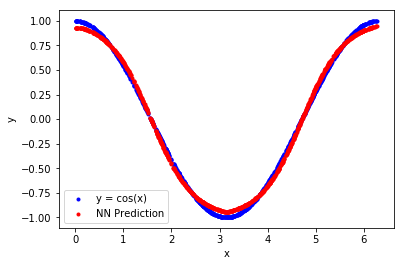

In [6]:
# Plot the actual (blue) vs. predicted (red) results
plt.scatter(2*x_test*math.pi,2*y_test-1,marker='.',color='blue',label='y = cos(x)')
plt.scatter(2*x_test*math.pi,2*y_pred-1,marker='.',color='red',label='NN Prediction')
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.show()